In [1]:
from matplotlib import pyplot as plt
import math

In [2]:
NEWYORK = False
dataproperties = {
    'data': {
        'label': 'Cases',
        'limit': 100,
    },
    'deaths': {
        'label': 'Deaths',
        'limit': 10,
    },
}

In [3]:
DO_TESTS = False
south_korea_tests = 5832
tests_million = {
    'italy': 3423,
    'germany': 3859,
    'spain': 642,
    'uk': 1007,
    'france': 165,
    'us': 166,
    'switzerland': 505,
}

tests_adjusted = {k: v/south_korea_tests for k, v in tests_million.items()}

In [4]:
import io
import json

infile = io.open('corona-data.json', mode='r', encoding='utf-8')

json_data = json.load(infile)

categories = json_data['categories']
countries = json_data['countries']

if NEWYORK:
    nyfactor = json_data['newyork']['nyfactor']
    nydfactor = json_data['newyork']['nydfactor']
    countries['new york'] = {}
    countries['new york']['population'] = 19540000
    countries['new york']['data'] = [x * nyfactor for x in countries['us']['data']]
    countries['new york']['deaths'] = [x * nydfactor for x in countries['us']['deaths']]

In [5]:
figkwargs = dict(
    figsize=(9, 9),
    dpi=80,
)
xtickskwargs = dict(
    rotation=70,
)

legendkwargs = dict(
    loc='upper left',
)

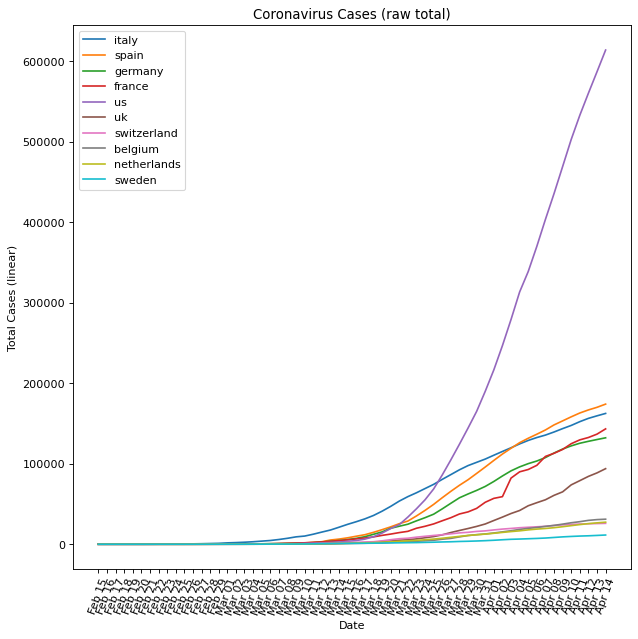

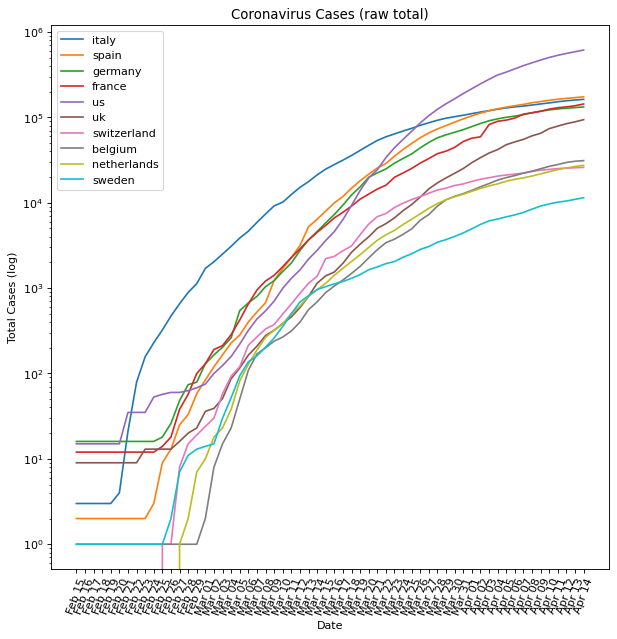

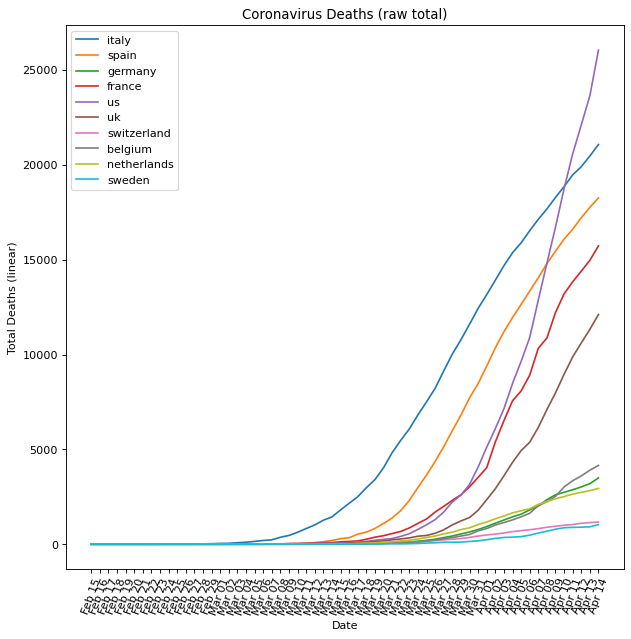

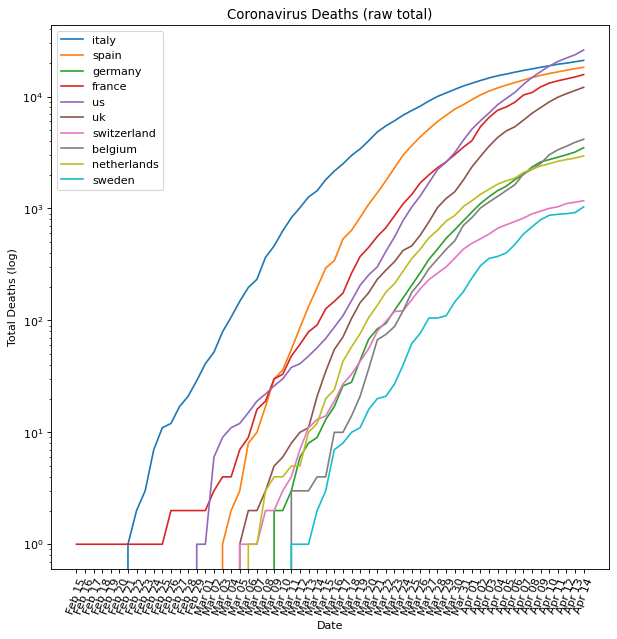

In [6]:
for datakey, datavalues in dataproperties.items():
    for yscale in ('linear', 'log'):
        datalabel = datavalues['label']
        datalimit = datavalues['limit']

        fig = plt.figure(**figkwargs)
        for country, cproperties in countries.items():
            try:
                data = cproperties[datakey]
            except KeyError:
                continue
            data += [float('NaN')] * (len(categories) - len(data))
            plt.plot(categories, data, label=country)

        plt.title('Coronavirus {} (raw total)'.format(datalabel))
        plt.ylabel('Total {} ({})'.format(datalabel, yscale))
        plt.xlabel('Date')
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()

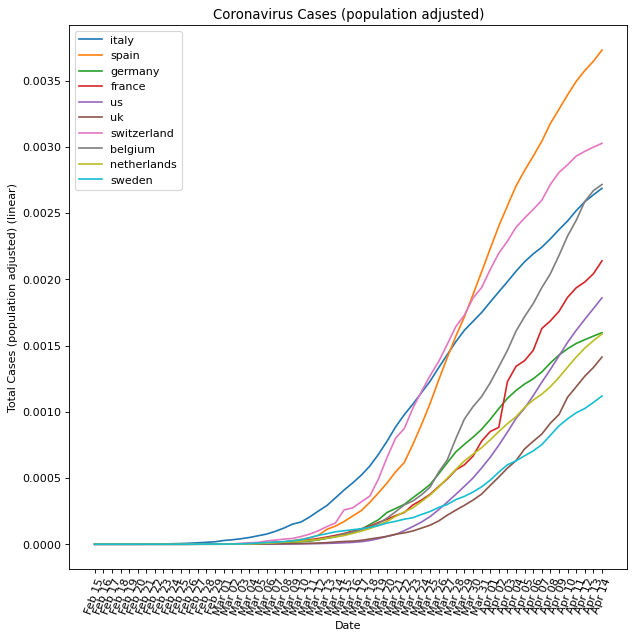

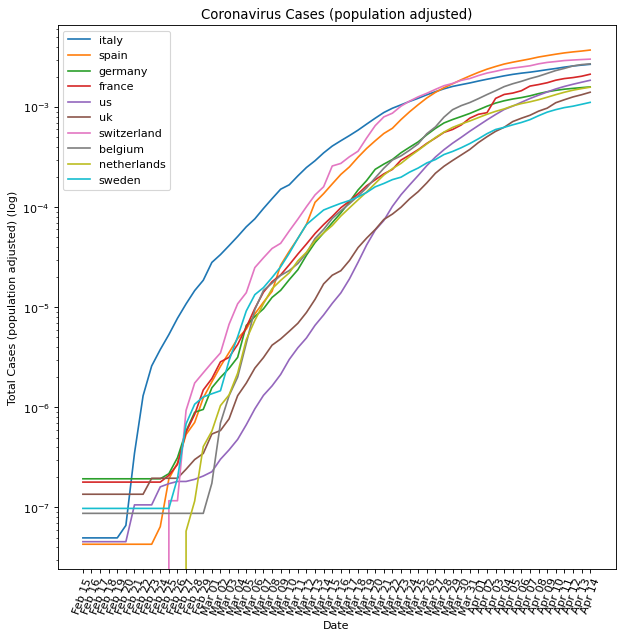

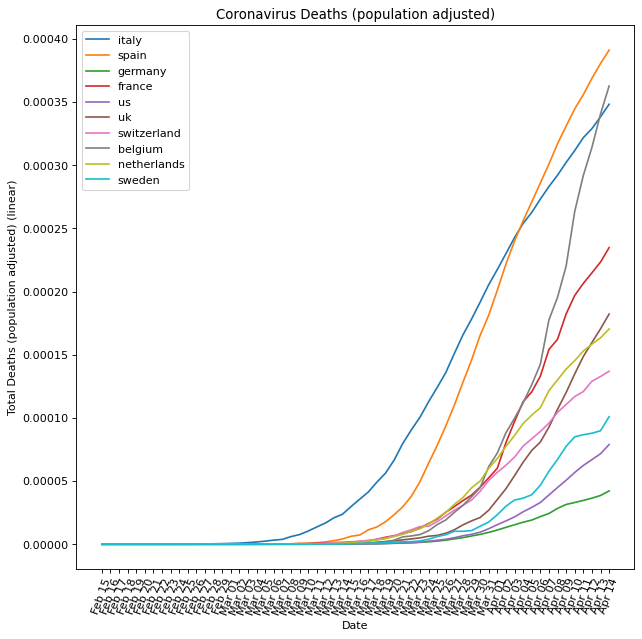

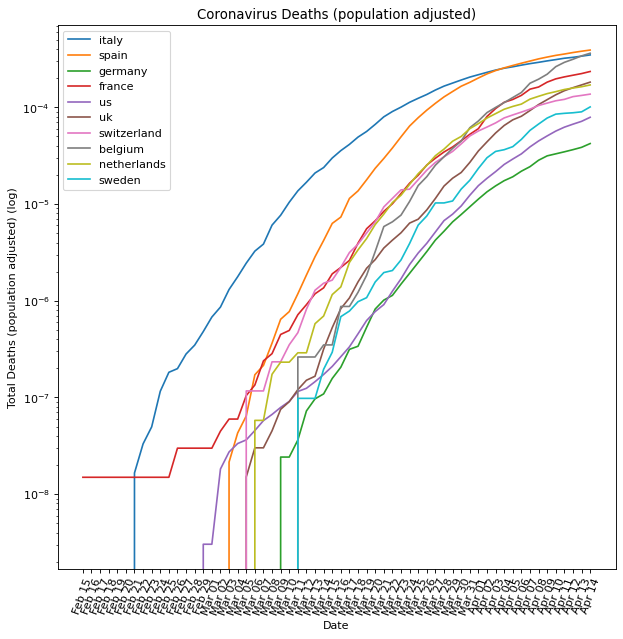

In [7]:
for datakey, datavalues in dataproperties.items():
    for yscale in ('linear', 'log'):
        datalabel = datavalues['label']
        datalimit = datavalues['limit']

        fig = plt.figure(**figkwargs)
        for country, cproperties in countries.items():
            population = cproperties['population']
            try:
                data = cproperties[datakey]
            except KeyError:
                continue
            data += [float('NaN')] * (len(categories) - len(data))
            data = [x/population for x in data]
            plt.plot(categories, data, label=country)

        plt.title('Coronavirus {} (population adjusted)'.format(datalabel))
        plt.ylabel('Total {} (population adjusted) ({})'.format(datalabel, yscale))
        plt.xlabel('Date')
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()

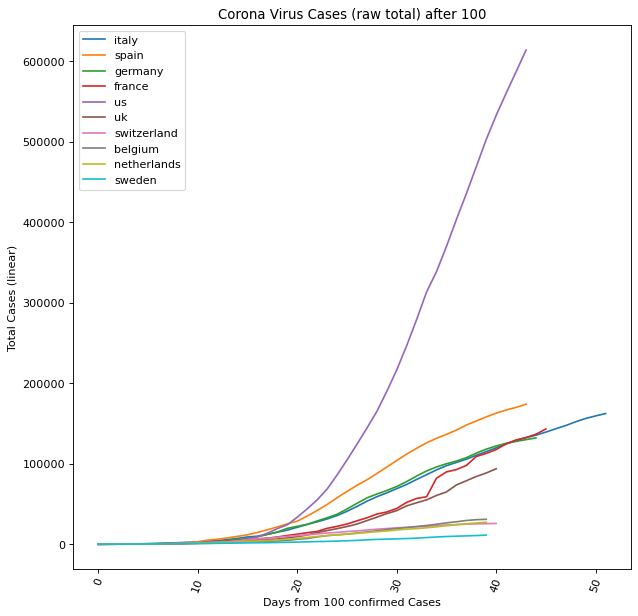

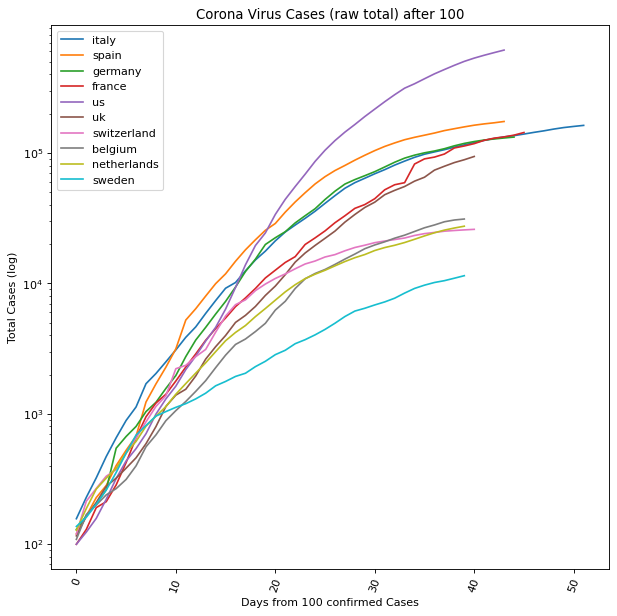

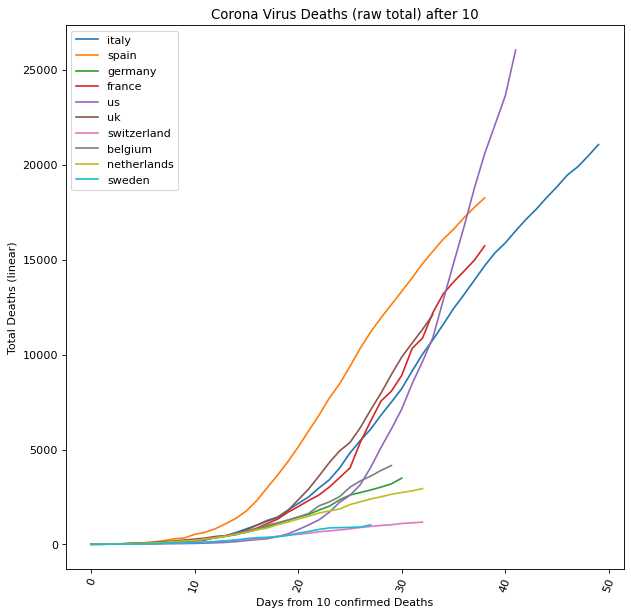

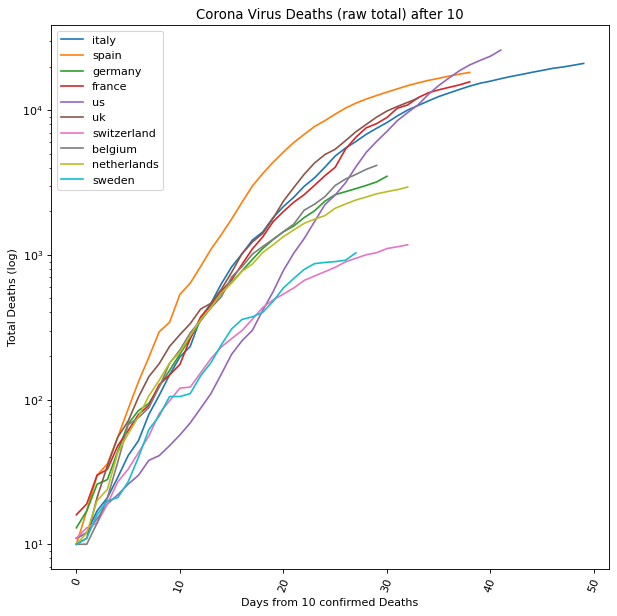

In [8]:
for datakey, datavalues in dataproperties.items():
    for yscale in ('linear', 'log'):
        datalabel = datavalues['label']
        datalimit = datavalues['limit']

        fig = plt.figure(**figkwargs)
        for country, cproperties in countries.items():
            population = cproperties['population']
            try:
                data = cproperties[datakey]
            except KeyError:
                continue
            data = [x for x in data if x >= datalimit]
            data += [float('NaN')] * (len(categories) - len(data))
            plt.plot(range(len(categories)), data, label=country)


        plt.title('Corona Virus {} (raw total) after {}'.format(datalabel, datalimit))
        plt.xticks(**xtickskwargs)
        plt.ylabel('Total {} ({})'.format(datalabel, yscale))
        plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
        plt.yscale(yscale)
        plt.legend(**legendkwargs)
        plt.show()

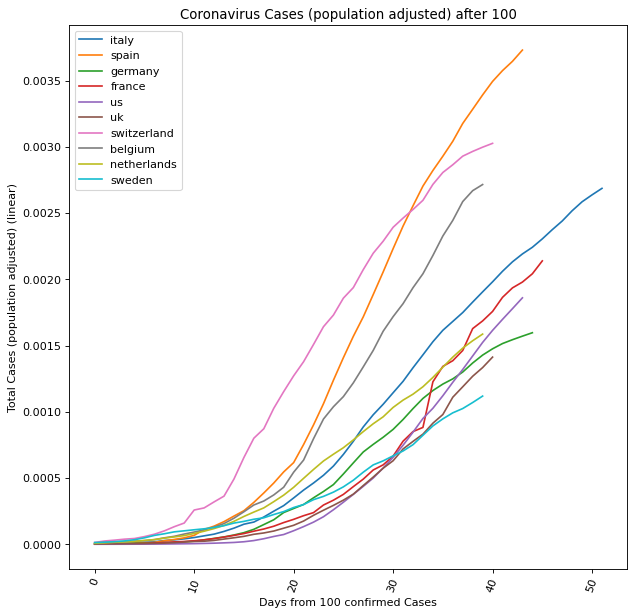

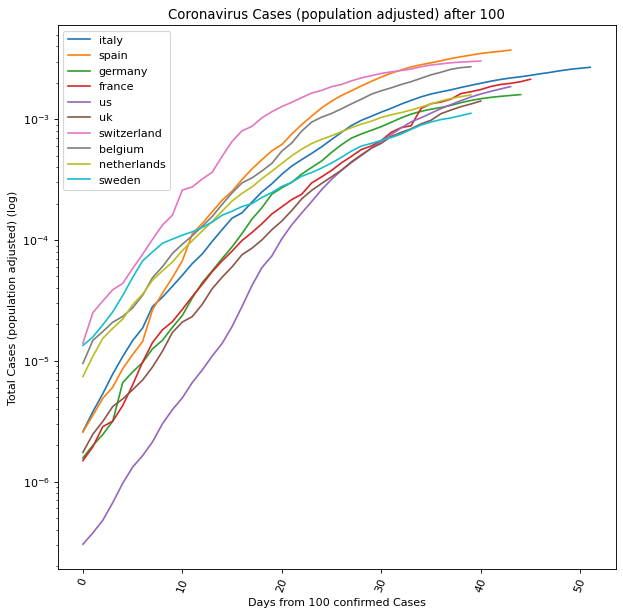

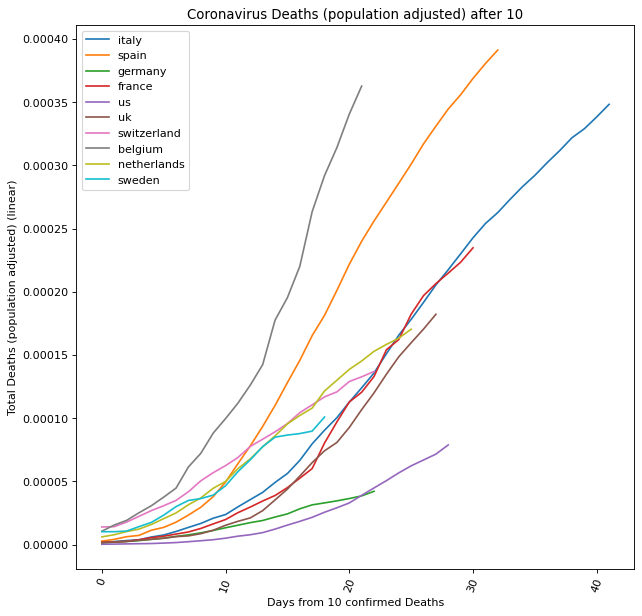

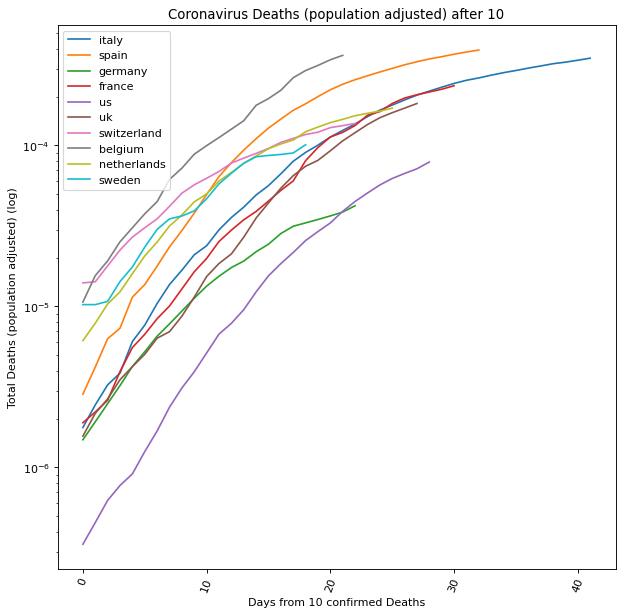

In [9]:
for datakey, datavalues in dataproperties.items():
    for yscale in ('linear', 'log'):
        datalabel = datavalues['label']
        datalimit = datavalues['limit']

        fig = plt.figure(**figkwargs)
        for country, cproperties in countries.items():
            population = cproperties['population']
            try:
                data = cproperties[datakey]
            except KeyError:
                continue
            data = [x for x in data if x >= 100]
            data += [float('NaN')] * (len(categories) - len(data))
            data = [x/population for x in data]
            plt.plot(range(len(categories)), data, label=country)


        plt.title('Coronavirus {} (population adjusted) after {}'.format(datalabel, datalimit))
        plt.ylabel('Total {} (population adjusted) ({})'.format(datalabel, yscale))
        plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()

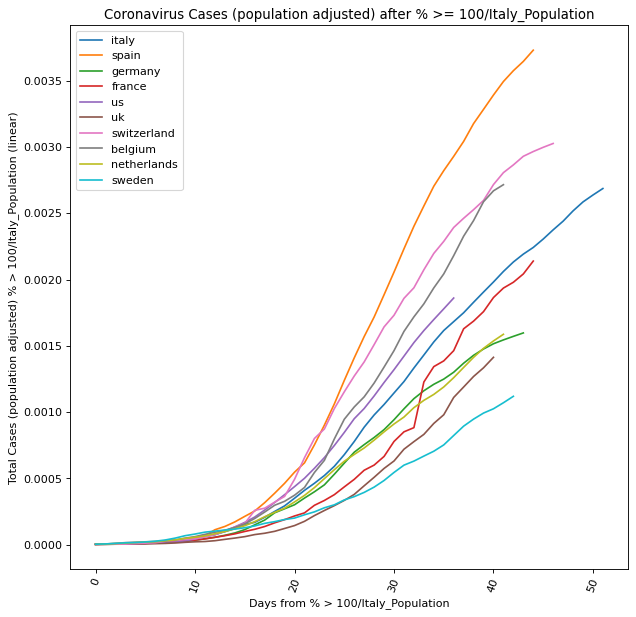

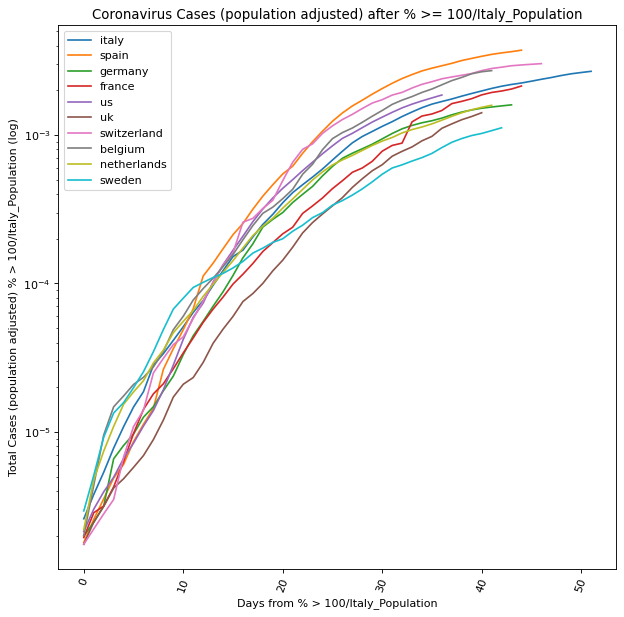

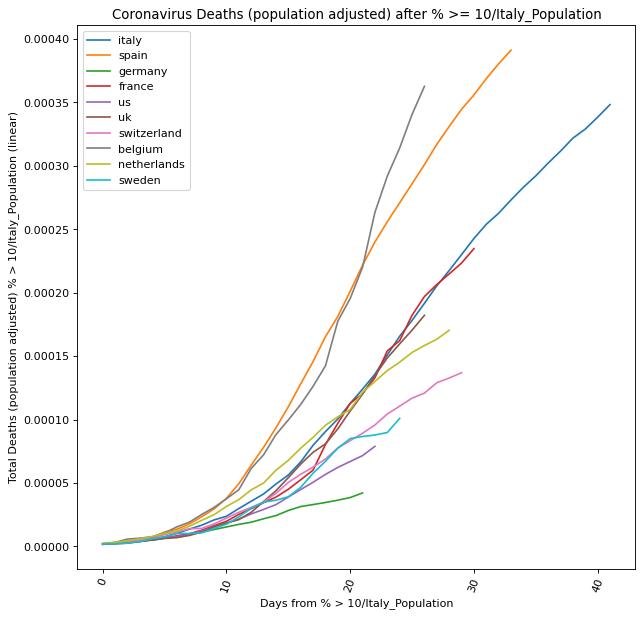

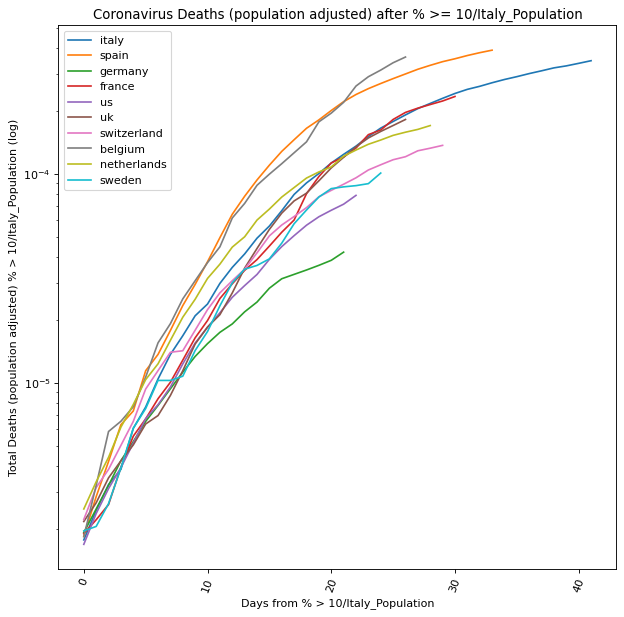

In [10]:
for datakey, datavalues in dataproperties.items():
    for yscale in ('linear', 'log'):
        datalabel = datavalues['label']
        datalimit = datavalues['limit']

        fig = plt.figure(**figkwargs)
        explodes = 100 / countries['italy']['population']
        for country, cproperties in countries.items():
            population = cproperties['population']
            try:
                data = cproperties[datakey]
            except KeyError:
                continue
            data = [x/population for x in data if x/population >= explodes]
            data += [float('NaN')] * (len(categories) - len(data))
            plt.plot(range(len(categories)), data, label=country)


        plt.title('Coronavirus {} (population adjusted) after % >= {}/Italy_Population'.format(datalabel, datalimit))
        plt.ylabel('Total {} (population adjusted) % > {}/Italy_Population ({})'.format(datalabel, datalimit, yscale))
        plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()

In [11]:
if DO_TESTS:
    datakey = 'data'
    datavalues = dataproperties['data']
    datalabel = datavalues['label']
    datalimit = datavalues['limit']

    for yscale in ('linear', 'log'):
        fig = plt.figure(**figkwargs)
        explodes = 100 / countries['italy']['population']
        for country, cproperties in countries.items():
            population = cproperties['population']
            try:
                testadj = tests_adjusted[country] 
            except KeyError:
                continue
            data = cproperties[datakey]
            data = [x/population for x in data if x/population >= explodes]
            data = [x/testadj for x in data]
            data += [float('NaN')] * (len(categories) - len(data))
            plt.plot(range(len(categories)), data, label=country)


        plt.title(('Coronavirus {} (population and tests adjusted)\n'
                   ' after % >= 100/Italy_Population\n'
                   ' (South Korea is 1 for tests/million people)').format(datalabel))
        plt.ylabel('Total {} (population and tests adjusted) % > {}/Italy_Population ({})'.format(datalabel, datalimit, yscale))
        plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()

In [12]:
if DO_TESTS:
    datakey = 'data'
    datavalues = dataproperties['data']
    datalabel = datavalues['label']
    datalimit = datavalues['limit']

    explodes = 100 / countries['italy']['population']
    data_store = {}
    data_lens = []
    for country, cproperties in countries.items():
        population = cproperties['population']
        try:
            data = cproperties[datakey]
        except KeyError:
            continue
        data = [x/population for x in data if x/population >= explodes]
        data_lens.append(len(data))
        data_store[country] = data

    maxlen = max(data_lens)

    for yscale in ('linear', 'log'):
        fig = plt.figure(**figkwargs)
        for country, data in data_store.items():
            try:
                tests = tests_million[country] 
            except KeyError:
                continue

            # How many more tests at the actual pace to match the
            # longest virus streak (which we know is Italy)
            ldata = len(data)
            try:
                test_pace = tests / ldata
            except ZeroDivisionError:
                data = [float('NaN')] * len(categories)
            else:
                # max tests adjusted to korea max
                max_tests = maxlen * test_pace
                testadj = max_tests / south_korea_tests
                data = [x/testadj for x in data]
                data += [float('NaN')] * (len(categories) - len(data))

            plt.plot(range(len(categories)), data, label=country)


        plt.title(('Coronavirus {} (population and tests adjusted)\n'
                   ' after % >= /Italy_Population\n'
                   ' (South Korea is 1 for tests/million people)\n'
                   ' (Max number of tests for longest streak at actual pace)').format(datalabel, datalimit))
        plt.ylabel('Total {} (population and tests adjusted) % > {}/Italy_Population ({})'.format(datalabel, datalimit, yscale))
        plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
        plt.yscale(yscale)
        plt.xticks(**xtickskwargs)
        plt.legend(**legendkwargs)
        plt.show()